# 2. Data load

모델 학습 시 작은 양의 데이터를 사용할 때에는 모든 데이터를 한번에 처리할 수 있지만, 데이터의 양이 많아지면 처리에 어려움이 발생합니다. 

PyTorch  에서는 `torch.utils.data` 의 `DataLoader` 클래스로 데이터 셋을 batch 단위로 끊어 모델 학습에 전달하는 등 데이터를 나누어 관리할 수 있습니다.

이번 파트에서는 PyTorch 에서 모델 학습 시 데이터를 불러오는 방법에 대해 DataLoader 클래스와 함께 살펴보겠습니다.

## 2.1 DataLoader

우선, DataLoader 클래스의 파라미터를 안내하겠습니다.

### 2.1.1 Batch

Batch 는 한번에 처리할 데이터 양을 의미합니다. 모델 학습 시 전체 데이터를 Batch 단위로 묶어 처리할 수 있습니다.

DataLoader 클래스에서는 `batch_size`  파라미터를 사용하여 Batch 의 크기를 조정합니다. 이때, 데이터 셋의 총 크기가 100일 때, batch_size 가 10 인 경우, 10번의 iteration 을 통해 모든 데이터를 거칠 수 있습니다.

`batch_size`  파라미터 값을 64로 설정하여 dataloader 객체를 정의하겠습니다. 주의해야 할 점은 각 데이터가 tensor 형태여야 합니다. transform 으로 tensor 로 변환하여 데이터를 가져왔던  `cifar_test_ToTensor` 데이터 셋을 DataLoader 로 가져오겠습니다.

In [67]:
from torch.utils.data import DataLoader

loader = DataLoader(cifar_test_ToTensor, batch_size=64)

loader 은 train 데이터 셋의 feature, label 과, test 데이터셋의 feature, label 의 batch 단위의 묶음을 가져옵니다. 따라서 loader  의 shape 는 다음과 같습니다.

In [68]:
feature, label = next(iter(loader))
print("feature shape : ",feature.shape)
print("label shape : ",label.shape)

feature shape :  torch.Size([64, 3, 32, 32])
label shape :  torch.Size([64])


이때, feature shape 는 `torch.Size([64, 3, 32, 32])` 로 64 는 batch_size, 3은 channel 수로 cifar 이미지가 3개의 채널(RGB)로 구성됨을 의미합니다. 또한 32, 32는 데이터의 크기가 32*32 픽셀임을 뜻합니다.

label 의 크기 역시 batch_size 로 64 크기의 int로 구성되어 있음을 확인할 수 있습니다.

---

### 2.1.2 Shuffle

shuffle 은 데이터를 DataLoader 에서 섞어서 사용할지를 설정하는 파라미터입니다. 이때, test 데이터 셋에서는 shuffle 값을 false 로 설정하는 것에 유의해야 합니다. 또한 모델 학습 시 seed 를 고정하여 재현성을 유지하기 위해 `torch.manual_seed` 를 설정합니다.

DataLoader 클래스에서 `shuffle `  파라미터는 bool 형태로 True, False 값이 사용됩니다.

 `shuffle `  파라미터를 새로 지정하여 dataloader 객체를 정의하겠습니다. seed  또한 고정해두겠습니다.

In [69]:
from torch.utils.data import DataLoader

torch.manual_seed(42)
loader_with_shuffle = DataLoader(cifar_test_ToTensor, batch_size=64, shuffle=True)

feature_with_shuffle, label = next(iter(loader_with_shuffle))

8번째 이미지를 기준으로 shuffle 된 데이터 셋과 원본 데이터 셋을 비교하여 Shuffle 의 효과를 확인해보겠습니다. 

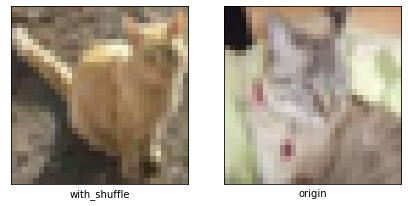

In [75]:
fig = plt.figure(figsize=(7, 7))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(feature_with_shuffle[8].permute(1,2,0))
ax1.set_xlabel("with_shuffle")
ax1.set_xticks([]), ax1.set_yticks([])
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(feature[8].permute(1,2,0))
ax2.set_xlabel("origin")
ax2.set_xticks([]), ax2.set_yticks([])
 
plt.show()

같은 index 의 이미지이지만 서로 다른 이미지가 출력되는 것을 통해 shuffle 을 통해 데이터가 섞였음을 확인할 수 있습니다.

---

### 2.1.3 num_workers

- 추가 필요, 참조 자료 : https://jybaek.tistory.com/799
- 멀티 쓰래딩 관련하여 작성할 예정



이 외에도 sampler,  drop_last 등이 사용됩니다. 관련하여 공식문서 ([링크](https://pytorch.org/docs/stable/data.html)) 를 참조바랍니다.



---





### 2.2 custom DataLoader

사용자가 직접 DataLoader 을 정의하여 사용할 수도 있습니다.

DataLoader 클래스는 크게 3가지 파트로 구분됩니다.



#### 2.2.1 init



#### 2.2.2 get item



#### 2.2.3 len



- https://tutorials.pytorch.kr/beginner/data_loading_tutorial.html
- https://wingnim.tistory.com/33



---

*추가 예정*